# Importación de los datos

In [1]:
import pandas as pd
df_pre = pd.read_csv('EDAdatos.csv', low_memory= False)
df_pre = df_pre[df_pre['mapped_highway'] != 'unclassified']
df_pre.columns

Index(['Unnamed: 0', 'index', 'num_expediente', 'fecha', 'hora',
       'localizacion', 'numero', 'cod_distrito', 'distrito', 'tipo_accidente',
       'estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad',
       'sexo', 'cod_lesividad', 'lesividad', 'coordenada_x_utm',
       'coordenada_y_utm', 'positiva_alcohol', 'positiva_droga', 'longitud',
       'latitud', 'osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'geometry', 'junction', 'ref', 'tunnel', 'access',
       'bridge', 'width', 'est_width', 'u_v_k', 'edgedistance', 'nodedistance',
       'dia', 'mes', 'año', 'temperatura_media', 'precipitaciones(mm)',
       'velocidad_media_aire', 'ubi', 'mapped_highway', 'speed_limit',
       'speed_bin', 'lanes_filled'],
      dtype='object')

In [2]:
import pandas as pd
import  numpy as np

df = pd.read_csv('df_pre_clustering(colcompletabien).csv', low_memory= False)
def clasificar_vehiculos(df):
    # Lista de vehículos con 4 ruedas o más
    vehiculos_4_ruedas = [
        "Turismo", "Furgoneta", "Autobús", "Camión rígido", "Todo terreno",
        "Tractocamión", "Maquinaria de obras", "Autobús articulado", 
        "Vehículo articulado", "Autobus EMT", "Cuadriciclo ligero", 
        "Autocaravana", "Cuadriciclo no ligero", "Semiremolque", 
        "Camión de bomberos", "Remolque", "Autobús articulado EMT",
        "Maquinaria agrícola", "Microbús <= 17 plazas", "Tranvía"
    ]
    
    # Crear la nueva columna mapeando 1 o 0
    df['vehiculo_mas_4_ruedas'] = df['tipo_vehiculo'].apply(lambda x: 1 if x in vehiculos_4_ruedas else 0)
    
    return df
df['tipo_vehiculo'] = df_pre['tipo_vehiculo']
clasificar_vehiculos(df)
df['lesividad'] = df_pre['lesividad']
df['lesividad_binaria'] = df['lesividad'].apply(lambda x: 0 if x == 'Sin asistencia sanitaria' else (1 if pd.notna(x) else np.nan))

In [3]:
df.columns

Index(['fecha', 'hora', 'coordenada_x_utm', 'coordenada_y_utm', 'latitud',
       'longitud', 'temperatura_media', 'precipitaciones(mm)',
       'velocidad_media_aire', 'oneway', 'lanes_filled', 'mapped_highway',
       'speed_limit', 'reversed', 'length', 'junction', 'tunnel', 'bridge',
       'edgedistance', 'nodedistance', 'close_to_intersection', 'day_of_week',
       'day_of_month', 'month', 'hour_sin', 'hour_cos',
       'time_of_day_Madrugada', 'time_of_day_Mañana', 'time_of_day_Noche',
       'time_of_day_Tarde', 'day_category', 'day_category_encoded',
       'month_sin', 'month_cos', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'highway_Avenidas Principales',
       'highway_Calles Grandes', 'highway_Calles Pequeñas',
       'highway_Carreteras/Autopistas', 'highway_category', 'lanes_1',
       'lanes_2', 'lanes_3+', 'coordenada_x_utm_norm', 'coordenada_y_utm_norm',
       'temperatura_media_norm', 'precipitaciones(mm)_norm',
       'velocidad_media

In [3]:
df_ml = df.dropna(subset=['lesividad'])
df_ml = df_ml[['month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'vehiculo_mas_4_ruedas', 'coordenada_x_utm_norm', 'coordenada_y_utm_norm', 'temperatura_media_norm','precipitaciones(mm)_norm','velocidad_media_aire_norm', 'oneway', 'lanes_1',
       'lanes_2', 'lanes_3+', 'highway_Avenidas Principales',
       'highway_Calles Grandes', 'highway_Calles Pequeñas',
       'highway_Carreteras/Autopistas', 'speed_limit_norm', 'junction', 'tunnel', 'bridge', 'close_to_intersection', 'lesividad_binaria']]

In [4]:
from sklearn.preprocessing import StandardScaler

# Lista de columnas numéricas a escalar
columnas_numericas = ['month_sin', 'month_cos', 'hour_sin', 'hour_cos',
                      'coordenada_x_utm_norm', 'coordenada_y_utm_norm',
                      'temperatura_media_norm', 'precipitaciones(mm)_norm',
                      'velocidad_media_aire_norm', 'speed_limit_norm']

# Verificar si hay valores nulos en las columnas numéricas
if df_ml[columnas_numericas].isnull().sum().sum() > 0:
    print("Hay valores nulos en las columnas numéricas.")
else:
    # Crear una instancia del escalador
    scaler = StandardScaler()
    
    # Ajustar el escalador y transformar las columnas numéricas
    df_ml[columnas_numericas] = scaler.fit_transform(df_ml[columnas_numericas])
    
    # Verificar el resultado
    print(df_ml[columnas_numericas].describe())


          month_sin     month_cos      hour_sin      hour_cos  \
count  1.314850e+05  1.314850e+05  1.314850e+05  1.314850e+05   
mean  -1.313168e-17  5.620143e-17  5.949786e-17  9.186772e-19   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -1.511429e+00 -1.421965e+00 -1.081335e+00 -1.184617e+00   
25%   -7.924482e-01 -1.234988e+00 -8.765748e-01 -9.828122e-01   
50%   -7.346787e-02 -2.634523e-02 -3.171592e-01 -4.314722e-01   
75%    1.171843e+00  1.182297e+00  8.425834e-01  7.115284e-01   
max    1.364493e+00  1.369275e+00  1.975369e+00  1.827961e+00   

       coordenada_x_utm_norm  coordenada_y_utm_norm  temperatura_media_norm  \
count           1.314850e+05           1.314850e+05            1.314850e+05   
mean           -5.640678e-16          -3.990301e-16           -3.873575e-16   
std             1.000004e+00           1.000004e+00            1.000004e+00   
min            -3.850650e+00          -2.855274e+00           -2.582921e+00   
25%            -6.2

# ML SUPERVISADO

## Matriz de correlación

In [24]:
df_ml['lesividad_binaria'].value_counts()

lesividad_binaria
0    72836
1    58649
Name: count, dtype: int64

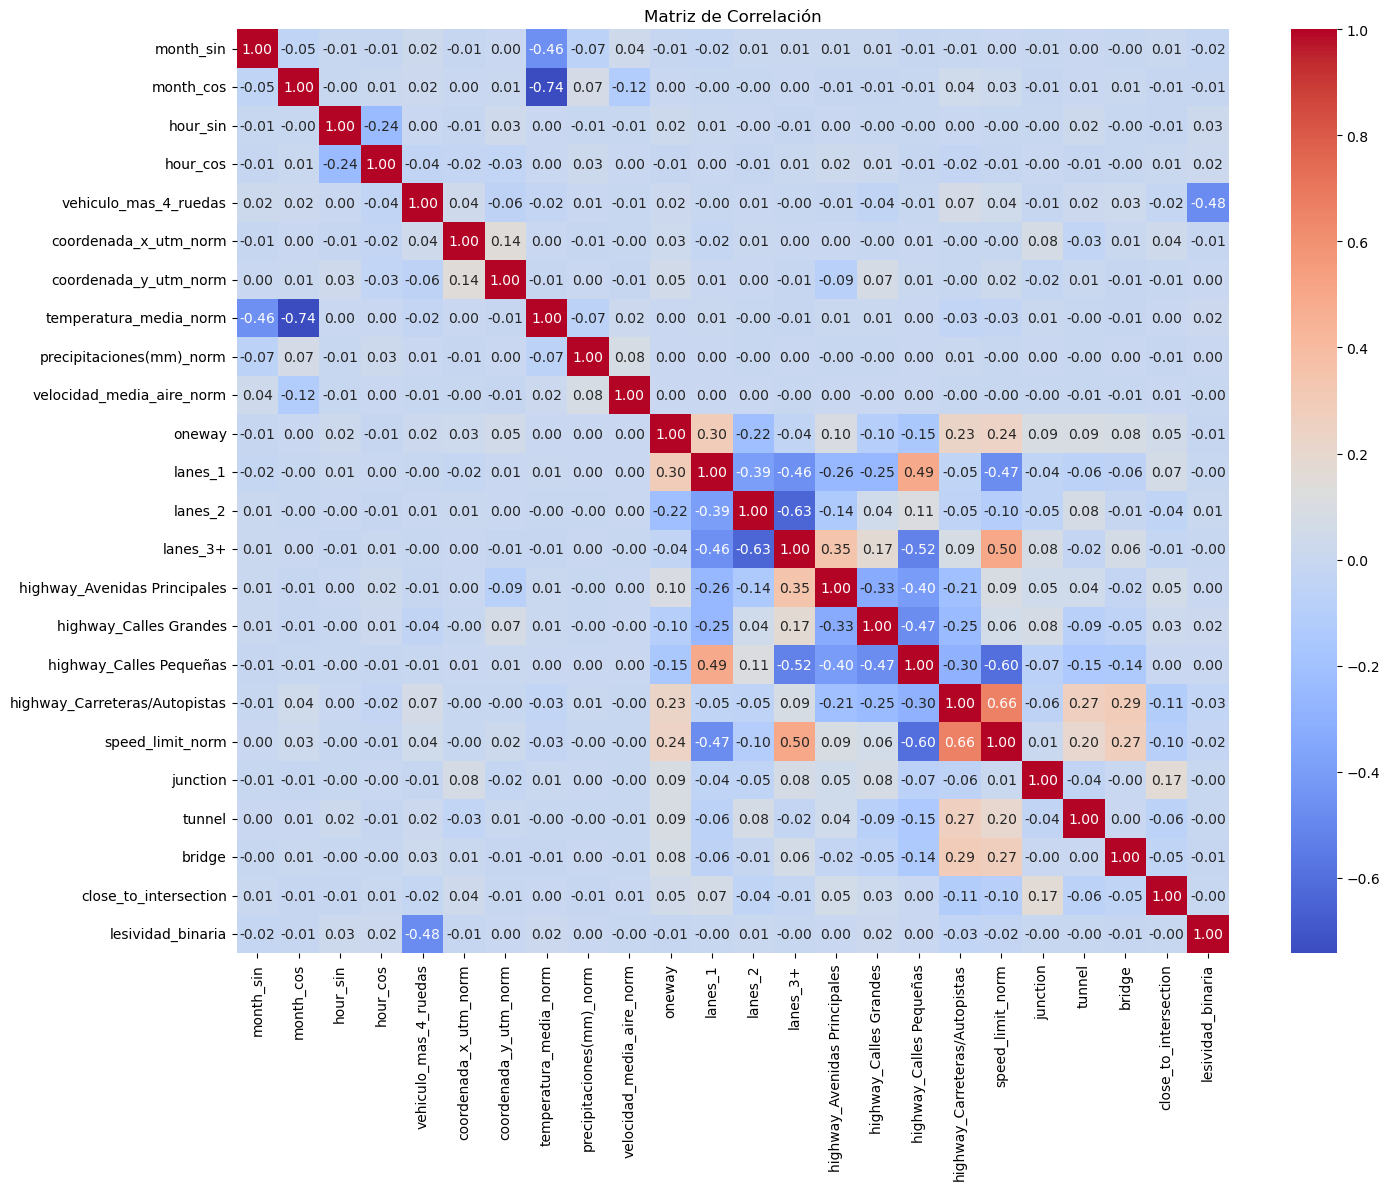

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# df = pd.read_csv('tu_dataset.csv')  # Si es necesario

# Asegurar tipos de datos correctos
df_ml['lesividad_binaria'] = df_ml['lesividad_binaria'].astype(int)
# Asegúrate de convertir otras columnas si es necesario

# Calcular matriz de correlación
corr_matrix = df_ml.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


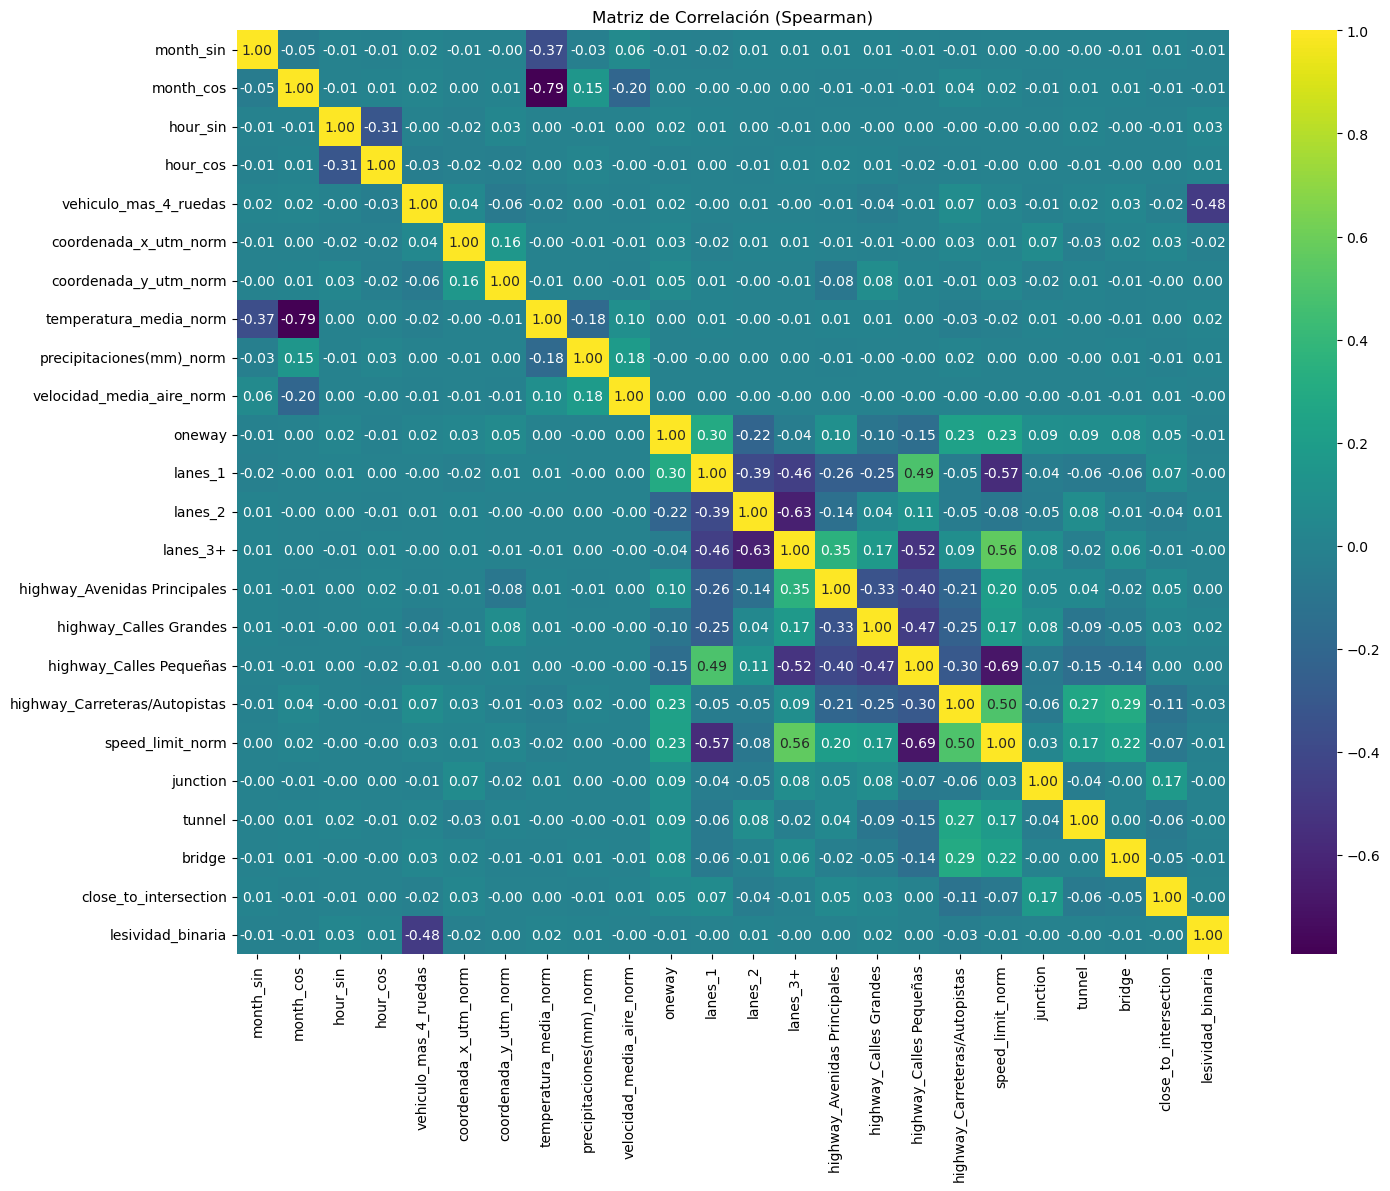

In [25]:
corr_matrix_spearman = df_ml.corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap='viridis')
plt.title('Matriz de Correlación (Spearman)')
plt.show()


## Random Forest

### Todas las variables

con tipo de vehiculo

In [18]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Configuración de logging para monitoreo
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def random_forest_classification(X_train, y_train, X_test):
    # Definir el modelo
    rf = RandomForestClassifier(random_state=42)

    # Espacio de búsqueda reducido para optimizar tiempo
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True],
        'criterion': ['gini']
    }

    # Configuración de RandomizedSearchCV con KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=25,  # Reducido a 50 iteraciones para mayor eficiencia
        cv=kf,
        random_state=42,
        n_jobs=12,
        scoring='accuracy',
        verbose=2  # Añadir verbose para ver el progreso de cada iteración
    )

    logging.info("Iniciando búsqueda de hiperparámetros...")
    start_time = time.time()
    
    # Ajustar el modelo
    random_search.fit(X_train, y_train)
    end_time = time.time()
    logging.info("Búsqueda de hiperparámetros finalizada.")
    logging.info(f"Tiempo total de búsqueda: {end_time - start_time:.2f} segundos")

    # Obtener el mejor modelo
    best_rf = random_search.best_estimator_
    logging.info(f"Mejores hiperparámetros encontrados: {random_search.best_params_}")

    # Hacer predicciones en el conjunto de prueba
    logging.info("Iniciando predicción en conjunto de prueba...")
    y_pred = best_rf.predict(X_test)
    logging.info("Predicción completada.")

    return best_rf, y_pred


In [20]:
best_rf_model, y_pred_rf = random_forest_classification(X_train, y_train, X_test)
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_rf_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


2024-11-11 07:51:57,084 - INFO - Iniciando búsqueda de hiperparámetros...


Fitting 5 folds for each of 25 candidates, totalling 125 fits


2024-11-11 07:56:53,942 - INFO - Búsqueda de hiperparámetros finalizada.
2024-11-11 07:56:53,942 - INFO - Tiempo total de búsqueda: 296.86 segundos
2024-11-11 07:56:53,943 - INFO - Mejores hiperparámetros encontrados: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
2024-11-11 07:56:53,943 - INFO - Iniciando predicción en conjunto de prueba...
2024-11-11 07:56:54,292 - INFO - Predicción completada.


Mejores hiperparámetros encontrados: RandomForestClassifier(max_depth=10, random_state=42)
Accuracy: 0.7349
Precisión: 0.8674
Recall: 0.4743
F1-Score: 0.6132


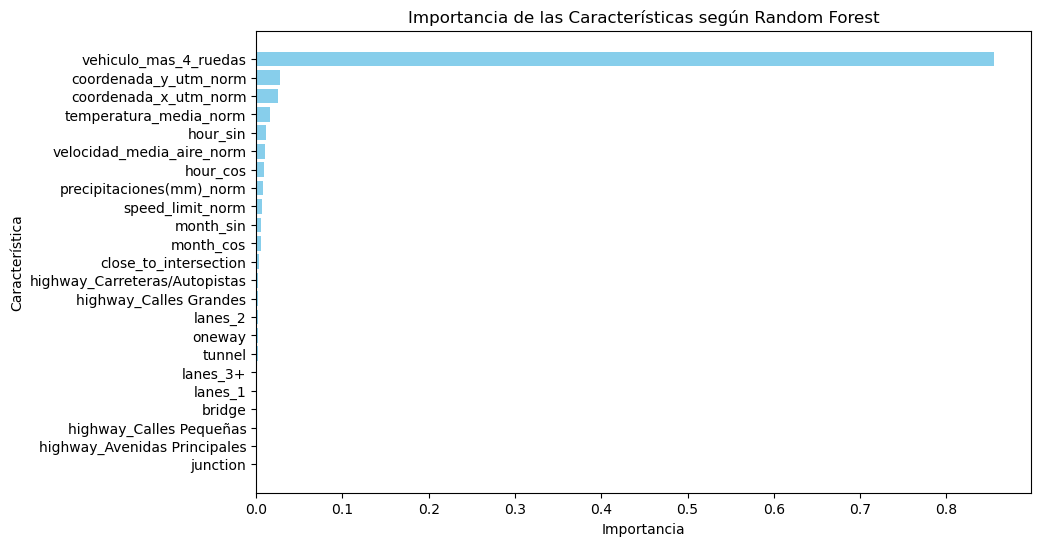

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'best_rf_model' es tu modelo entrenado
importancias = best_rf_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
df_importancias = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest')
plt.gca().invert_yaxis()
plt.show()


sin tipo de vehículo

In [55]:
df_ml.columns

Index(['month_sin', 'month_cos', 'hour_sin', 'hour_cos',
       'vehiculo_mas_4_ruedas', 'coordenada_x_utm_norm',
       'coordenada_y_utm_norm', 'temperatura_media_norm',
       'precipitaciones(mm)_norm', 'velocidad_media_aire_norm', 'oneway',
       'lanes_1', 'lanes_2', 'lanes_3+', 'highway_Avenidas Principales',
       'highway_Calles Grandes', 'highway_Calles Pequeñas',
       'highway_Carreteras/Autopistas', 'speed_limit_norm', 'junction',
       'tunnel', 'bridge', 'close_to_intersection', 'lesividad_binaria'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas', 'vehiculo_mas_4_ruedas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
best_rf_model, y_pred_rf = random_forest_classification(X_train, y_train, X_test)
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_rf_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

2024-11-11 05:11:00,815 - INFO - Iniciando búsqueda de hiperparámetros...


Fitting 5 folds for each of 25 candidates, totalling 125 fits


2024-11-11 05:16:30,604 - INFO - Búsqueda de hiperparámetros finalizada.
2024-11-11 05:16:30,605 - INFO - Tiempo total de búsqueda: 329.79 segundos
2024-11-11 05:16:30,606 - INFO - Mejores hiperparámetros encontrados: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
2024-11-11 05:16:30,607 - INFO - Iniciando predicción en conjunto de prueba...
2024-11-11 05:16:31,823 - INFO - Predicción completada.


Mejores hiperparámetros encontrados: RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)
Accuracy: 0.5543
Precisión: 0.4686
Recall: 0.0443
F1-Score: 0.0810


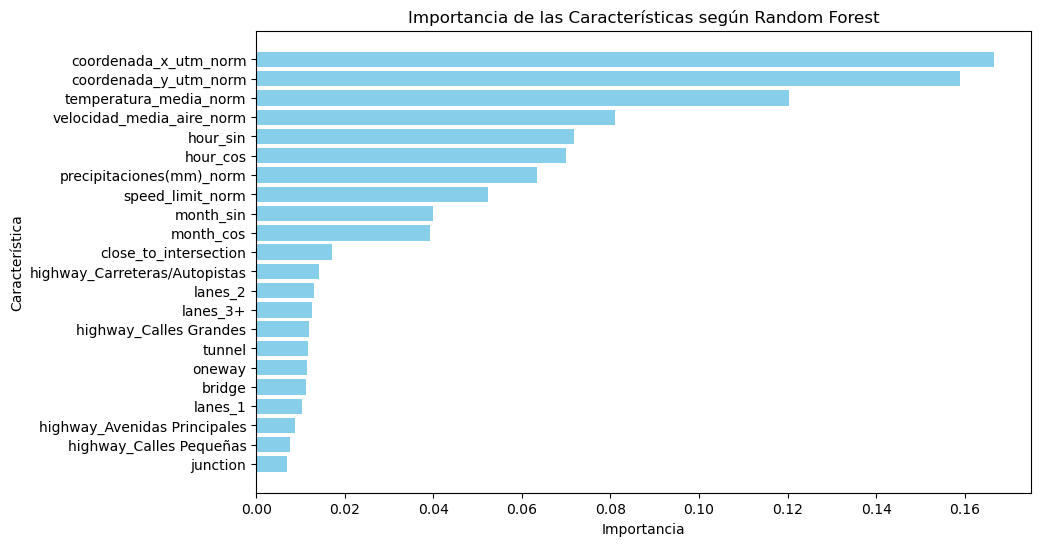

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'best_rf_model' es tu modelo entrenado
importancias = best_rf_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
df_importancias = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Árboles de decisión

con tipo de vehiculo

In [14]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mejores hiperparámetros encontrados: DecisionTreeClassifier(max_depth=2, min_samples_leaf=14, min_samples_split=9,
                       random_state=42)
Accuracy: 0.7348
Precisión: 0.8682
Recall: 0.4732
F1-Score: 0.6126


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\502161782.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


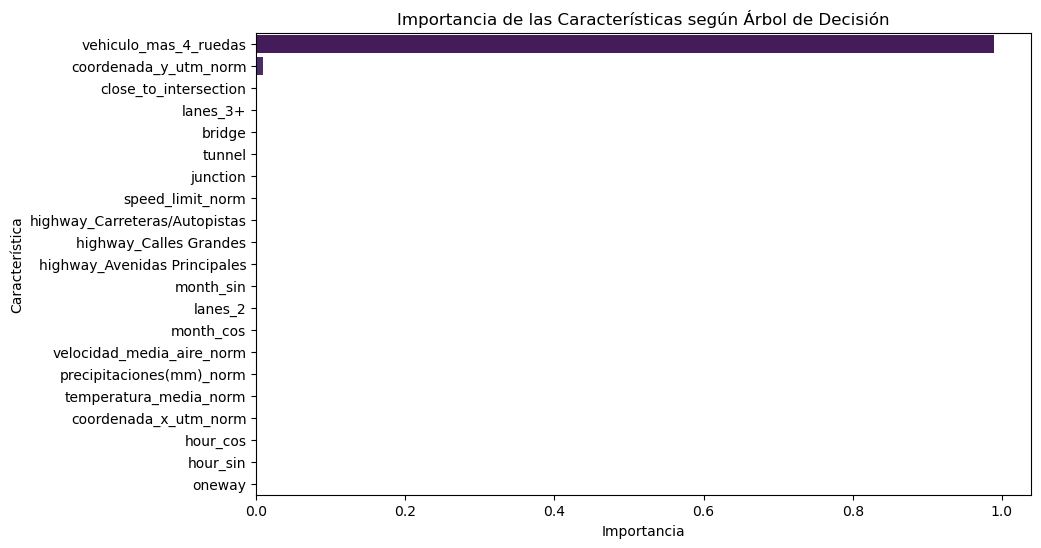

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def decision_tree_classification(X_train, y_train, X_test):
    # Definir el modelo base
    dt = DecisionTreeClassifier(random_state=42)

    # Definir el espacio de búsqueda de hiperparámetros
    param_dist = {
        'max_depth': [None] + list(np.arange(2, 20)),  # Profundidad del árbol
        'min_samples_split': np.arange(2, 20),  # Mínimo de muestras para dividir un nodo
        'min_samples_leaf': np.arange(1, 20),  # Mínimo de muestras en una hoja
        'max_features': [None, 'sqrt', 'log2'],  # Opciones válidas para max_features
        'criterion': ['gini', 'entropy']  # Criterio de división
    }

    # Configurar RandomizedSearchCV con KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=dt,
        param_distributions=param_dist,
        n_iter=40,  # Número de iteraciones
        cv=kf,
        random_state=42,
        n_jobs=12,
        scoring='accuracy'
    )

    # Ajustar el modelo
    random_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    best_dt = random_search.best_estimator_

    # Hacer predicciones en el conjunto de prueba
    y_pred = best_dt.predict(X_test)

    return best_dt, y_pred

# Ejecutar la función para obtener el mejor modelo y predicciones
best_dt_model, y_pred_dt = decision_tree_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_dt_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características para el árbol de decisión
feature_importance = best_dt_model.feature_importances_
features = X_train.columns

# Crear un DataFrame para ordenar e identificar las características más importantes
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


sin tipo de vehiculo

In [16]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas', 'vehiculo_mas_4_ruedas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mejores hiperparámetros encontrados: DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=4,
                       random_state=42)
Accuracy: 0.5569
Precisión: 0.5000
Recall: 0.0129
F1-Score: 0.0252


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\421326674.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


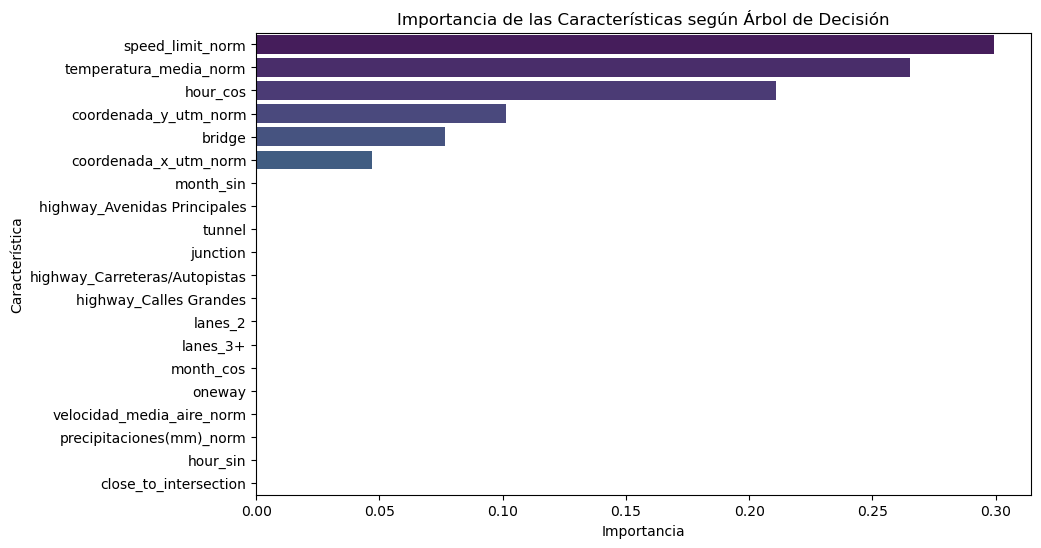

In [17]:
# Ejecutar la función para obtener el mejor modelo y predicciones
best_dt_model, y_pred_dt = decision_tree_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_dt_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características para el árbol de decisión
feature_importance = best_dt_model.feature_importances_
features = X_train.columns

# Crear un DataFrame para ordenar e identificar las características más importantes
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# Regresión logística

con tipo de vehiculo

In [68]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mejores hiperparámetros encontrados: LogisticRegression(C=166.81005372000558, max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')
Accuracy: 0.7348
Precisión: 0.8682
Recall: 0.4732
F1-Score: 0.6126


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_29116\2459535404.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


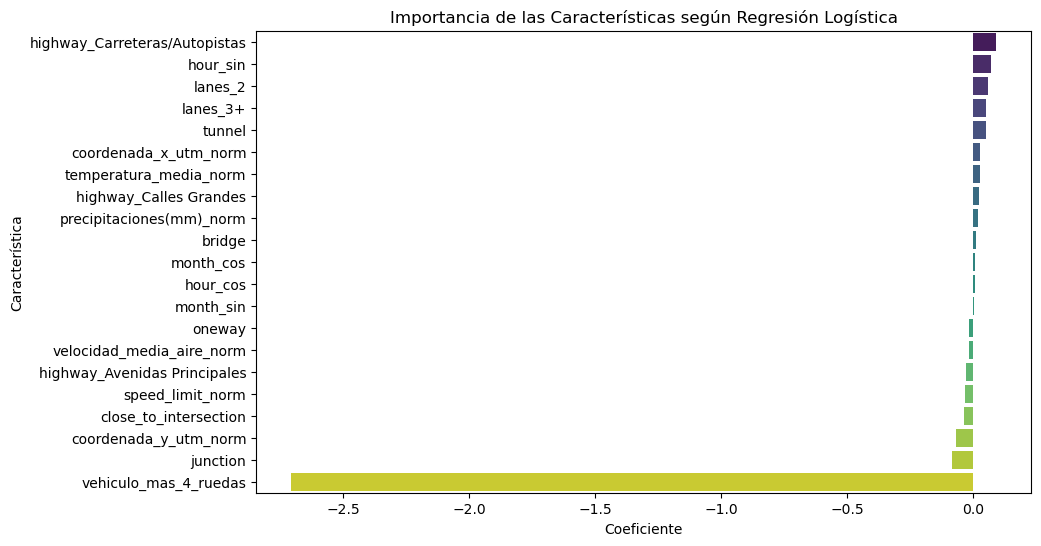

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def logistic_regression_classification(X_train, y_train, X_test):
    # Definir el modelo base
    lr = LogisticRegression(random_state=42, max_iter=1000)

    # Definir el espacio de búsqueda de hiperparámetros con combinaciones válidas
    param_dist = [
        {'penalty': ['l2'],
         'C': np.logspace(-4, 4, 10),
         'solver': ['lbfgs', 'sag', 'newton-cg']},
        {'penalty': ['l1'],
         'C': np.logspace(-4, 4, 10),
         'solver': ['liblinear', 'saga']},
        {'penalty': ['elasticnet'],
         'C': np.logspace(-4, 4, 10),
         'solver': ['saga'],
         'l1_ratio': np.linspace(0, 1, 7)}
    ]

    # Configurar RandomizedSearchCV con KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=lr,
        param_distributions=param_dist,
        n_iter=40,  # Número de iteraciones
        cv=kf,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Ajustar el modelo
    random_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    best_lr = random_search.best_estimator_

    # Hacer predicciones en el conjunto de prueba
    y_pred = best_lr.predict(X_test)

    return best_lr, y_pred

# Ejecutar la función para obtener el mejor modelo y predicciones
best_lr_model, y_pred_lr = logistic_regression_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_lr_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener los coeficientes de la regresión logística para visualizar la importancia de las características
feature_importance = best_lr_model.coef_[0]
features = X_train.columns

# Crear un DataFrame para ordenar e identificar las características más importantes
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()


sin tipo de vehiculo

In [70]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas', 'vehiculo_mas_4_ruedas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mejores hiperparámetros encontrados: LogisticRegression(C=0.046415888336127774, l1_ratio=0.8333333333333333,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')
Accuracy: 0.5573
Precisión: 0.5132
Recall: 0.0189
F1-Score: 0.0364


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_29116\2459535404.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


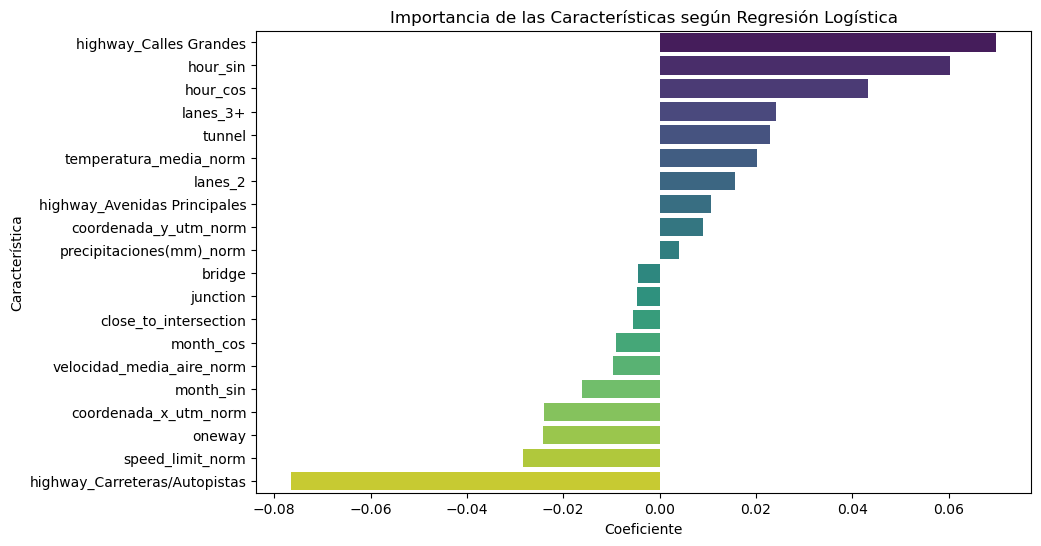

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def logistic_regression_classification(X_train, y_train, X_test):
    # Definir el modelo base
    lr = LogisticRegression(random_state=42, max_iter=1000)

    # Definir el espacio de búsqueda de hiperparámetros con combinaciones válidas
    param_dist = [
        {'penalty': ['l2'],
         'C': np.logspace(-4, 4, 10),
         'solver': ['lbfgs', 'sag', 'newton-cg']},
        {'penalty': ['l1'],
         'C': np.logspace(-4, 4, 10),
         'solver': ['liblinear', 'saga']},
        {'penalty': ['elasticnet'],
         'C': np.logspace(-4, 4, 10),
         'solver': ['saga'],
         'l1_ratio': np.linspace(0, 1, 7)}
    ]

    # Configurar RandomizedSearchCV con KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=lr,
        param_distributions=param_dist,
        n_iter=40,  # Número de iteraciones
        cv=kf,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Ajustar el modelo
    random_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    best_lr = random_search.best_estimator_

    # Hacer predicciones en el conjunto de prueba
    y_pred = best_lr.predict(X_test)

    return best_lr, y_pred

# Ejecutar la función para obtener el mejor modelo y predicciones
best_lr_model, y_pred_lr = logistic_regression_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_lr_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener los coeficientes de la regresión logística para visualizar la importancia de las características
feature_importance = best_lr_model.coef_[0]
features = X_train.columns

# Crear un DataFrame para ordenar e identificar las características más importantes
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()


# HistGradient Boosting


con el tipo de vehiculo

In [77]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mejores hiperparámetros encontrados: HistGradientBoostingClassifier(l2_regularization=1.0, random_state=42)
Accuracy: 0.7351
Precisión: 0.8666
Recall: 0.4753
F1-Score: 0.6139


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_29116\625930618.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


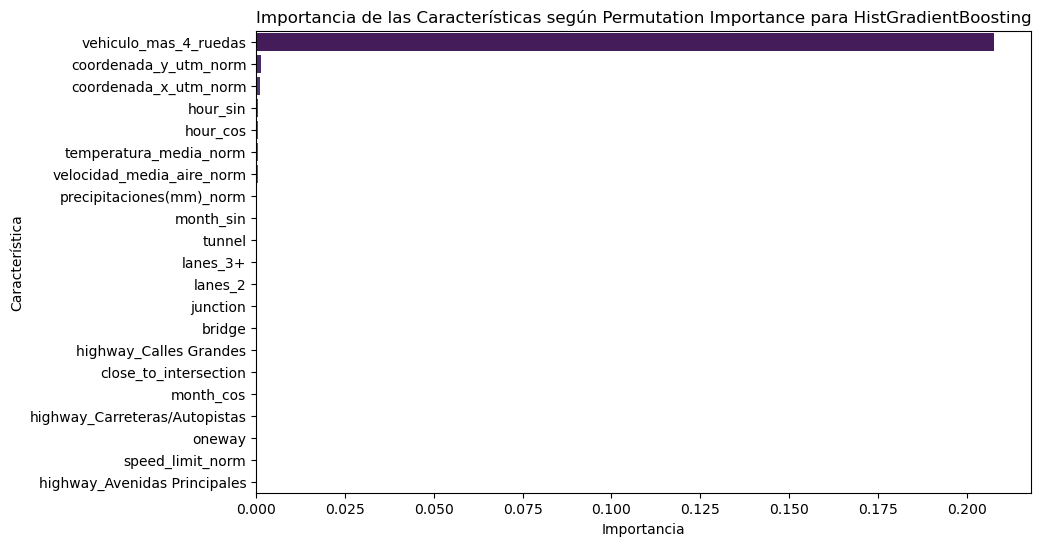

In [82]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def gradient_boosting_classification(X_train, y_train, X_test):
    # Definir el modelo base
    gb = HistGradientBoostingClassifier(random_state=42)

    # Definir el espacio de búsqueda de hiperparámetros
    param_dist = {
        'learning_rate': np.logspace(-3, 0, 10),
        'max_iter': [100, 200, 300],
        'max_leaf_nodes': [15, 31, 63],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [20, 50, 100],
        'l2_regularization': np.logspace(-3, 1, 5)
    }

    # Configurar RandomizedSearchCV con StratifiedKFold
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=gb,
        param_distributions=param_dist,
        n_iter=20,
        cv=skf,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Ajustar el modelo
    random_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    best_gb = random_search.best_estimator_

    # Hacer predicciones en el conjunto de prueba
    y_pred = best_gb.predict(X_test)

    return best_gb, y_pred

# Ejecutar la función para obtener el mejor modelo y predicciones
best_gb_model, y_pred_gb = gradient_boosting_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_gb_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características usando Permutation Importance
perm_importance = permutation_importance(best_gb_model, X_train, y_train, n_repeats=10, random_state=42)

# Crear un DataFrame para la importancia de las características
features = X_train.columns
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según Permutation Importance para HistGradientBoosting')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


Sin tipo de vehiculo

In [83]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas', 'vehiculo_mas_4_ruedas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mejores hiperparámetros encontrados: HistGradientBoostingClassifier(l2_regularization=10.0, max_depth=5,
                               max_iter=300, max_leaf_nodes=15,
                               min_samples_leaf=50, random_state=42)
Accuracy: 0.5567
Precisión: 0.4982
Recall: 0.0641
F1-Score: 0.1136


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_29116\3161566403.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


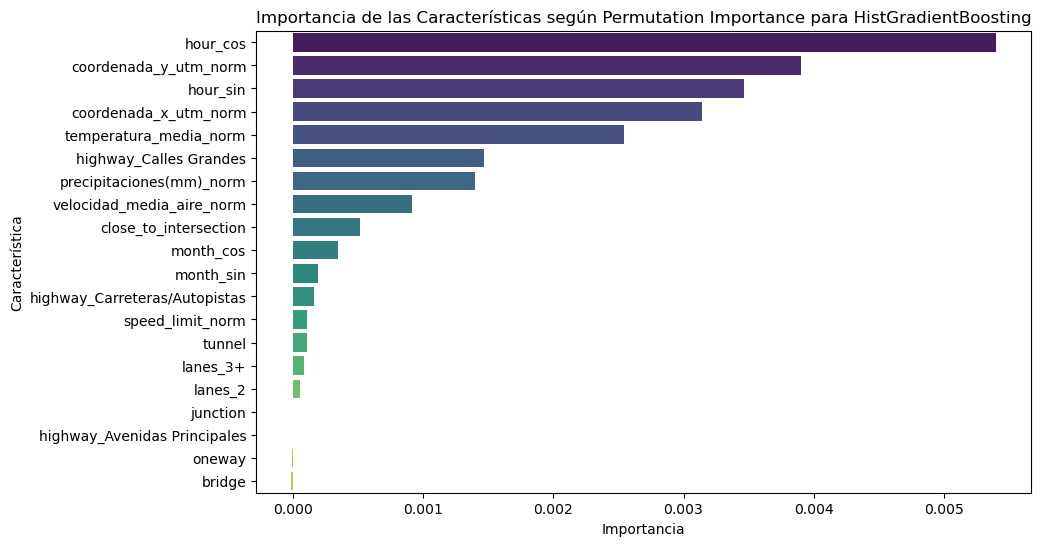

In [84]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def gradient_boosting_classification(X_train, y_train, X_test):
    # Definir el modelo base
    gb = HistGradientBoostingClassifier(random_state=42)

    # Definir el espacio de búsqueda de hiperparámetros
    param_dist = {
        'learning_rate': np.logspace(-3, 0, 10),
        'max_iter': [100, 200, 300],
        'max_leaf_nodes': [15, 31, 63],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [20, 50, 100],
        'l2_regularization': np.logspace(-3, 1, 5)
    }

    # Configurar RandomizedSearchCV con StratifiedKFold
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=gb,
        param_distributions=param_dist,
        n_iter=20,
        cv=skf,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Ajustar el modelo
    random_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    best_gb = random_search.best_estimator_

    # Hacer predicciones en el conjunto de prueba
    y_pred = best_gb.predict(X_test)

    return best_gb, y_pred

# Ejecutar la función para obtener el mejor modelo y predicciones
best_gb_model, y_pred_gb = gradient_boosting_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_gb_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características usando Permutation Importance
perm_importance = permutation_importance(best_gb_model, X_train, y_train, n_repeats=10, random_state=42)

# Crear un DataFrame para la importancia de las características
features = X_train.columns
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según Permutation Importance para HistGradientBoosting')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# XGBOOST

con el tipo de vehiculo

In [5]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c:\Users\JUAMARIO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:40:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.004641588833612777, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Accuracy: 0.7355
Precisión: 0.8670
Recall: 0.4760
F1-Score: 0.6146


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\3609422578.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


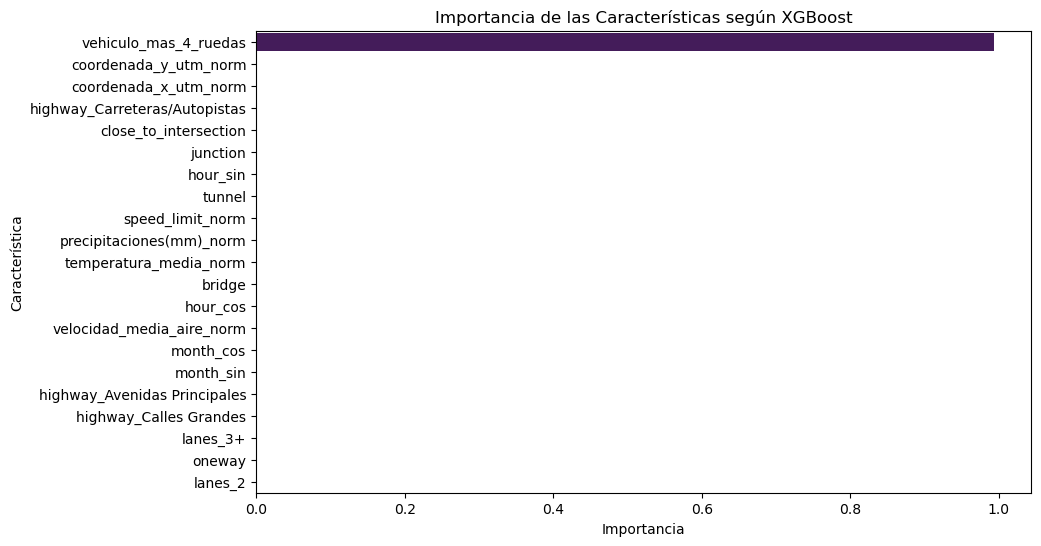

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def xgboost_classification(X_train, y_train, X_test):
    # Definir el modelo base
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Definir el espacio de búsqueda de hiperparámetros
    param_dist = {
        'learning_rate': np.logspace(-3, 0, 10),  # Tasa de aprendizaje
        'n_estimators': [100, 200, 300],  # Número de árboles
        'max_depth': [3, 6, 10],  # Profundidad máxima de cada árbol
        'subsample': [0.6, 0.8, 1.0],  # Fracción de muestras para entrenar cada árbol
        'colsample_bytree': [0.6, 0.8, 1.0],  # Fracción de características para cada árbol
        'gamma': [0, 0.1, 0.2, 0.3],  # Parámetro de regularización
        'reg_lambda': np.logspace(-3, 1, 5)  # Regularización L2
    }

    # Configurar RandomizedSearchCV con StratifiedKFold
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=20,  # Número de iteraciones para eficiencia
        cv=skf,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Ajustar el modelo
    random_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    best_xgb = random_search.best_estimator_

    # Hacer predicciones en el conjunto de prueba
    y_pred = best_xgb.predict(X_test)

    return best_xgb, y_pred

# Ejecutar la función para obtener el mejor modelo y predicciones
best_xgb_model, y_pred_xgb = xgboost_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_xgb_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características directamente del modelo
feature_importances = best_xgb_model.feature_importances_
features = X_train.columns

# Crear un DataFrame para la importancia de las características
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': feature_importances
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


sin tipo de vehiculo

In [7]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas', 'vehiculo_mas_4_ruedas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c:\Users\JUAMARIO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:43:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021544346900318832, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Accuracy: 0.5569
Precisión: 0.5004
Recall: 0.0371
F1-Score: 0.0691


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\289020300.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


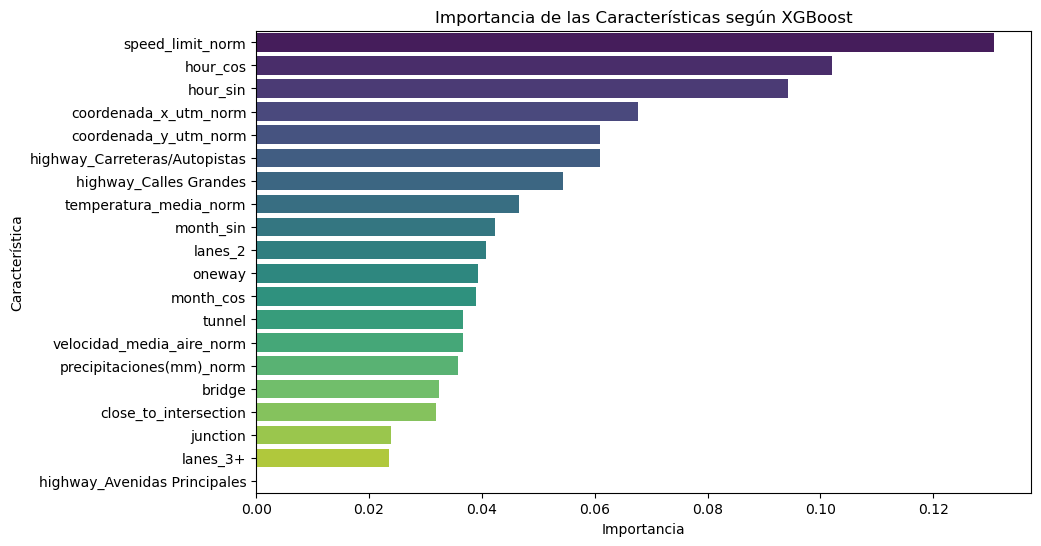

In [8]:
# Ejecutar la función para obtener el mejor modelo y predicciones
best_xgb_model, y_pred_xgb = xgboost_classification(X_train, y_train, X_test)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_xgb_model)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características directamente del modelo
feature_importances = best_xgb_model.feature_importances_
features = X_train.columns

# Crear un DataFrame para la importancia de las características
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': feature_importances
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# Naive Bayes

In [23]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.7346
Precisión: 0.8672
Recall: 0.4736
F1-Score: 0.6126


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\3771599224.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


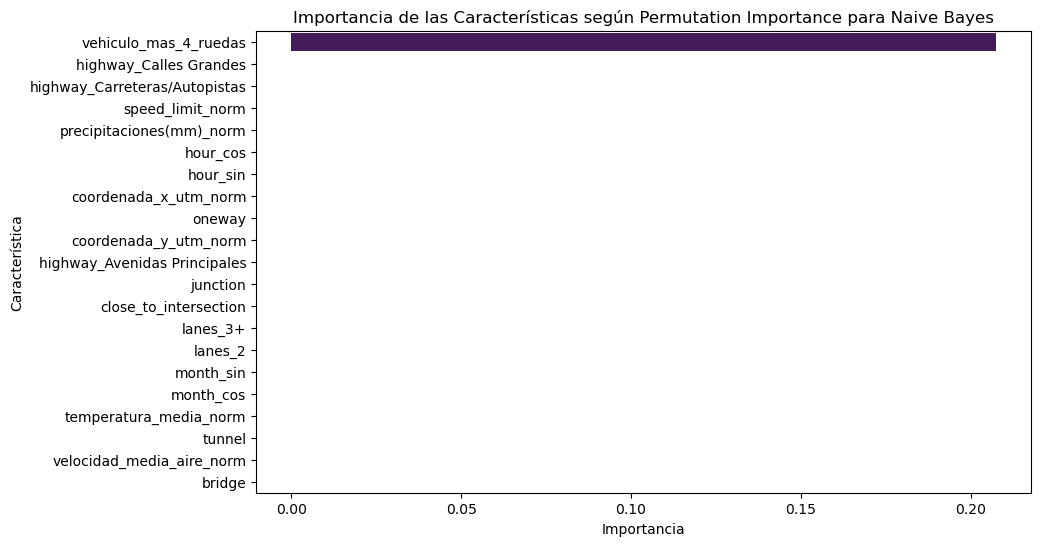

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def naive_bayes_classification(X_train, y_train, X_test):
    # Definir el modelo base
    nb = GaussianNB()

    # Ajustar el modelo a los datos de entrenamiento
    nb.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = nb.predict(X_test)

    return nb, y_pred

# Ejecutar la función para obtener el mejor modelo y predicciones
best_nb_model, y_pred_nb = naive_bayes_classification(X_train, y_train, X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características usando Permutation Importance
perm_importance = permutation_importance(best_nb_model, X_train, y_train, n_repeats=10, random_state=42)

# Crear un DataFrame para la importancia de las características
features = X_train.columns
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según Permutation Importance para Naive Bayes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\155222538.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='viridis')


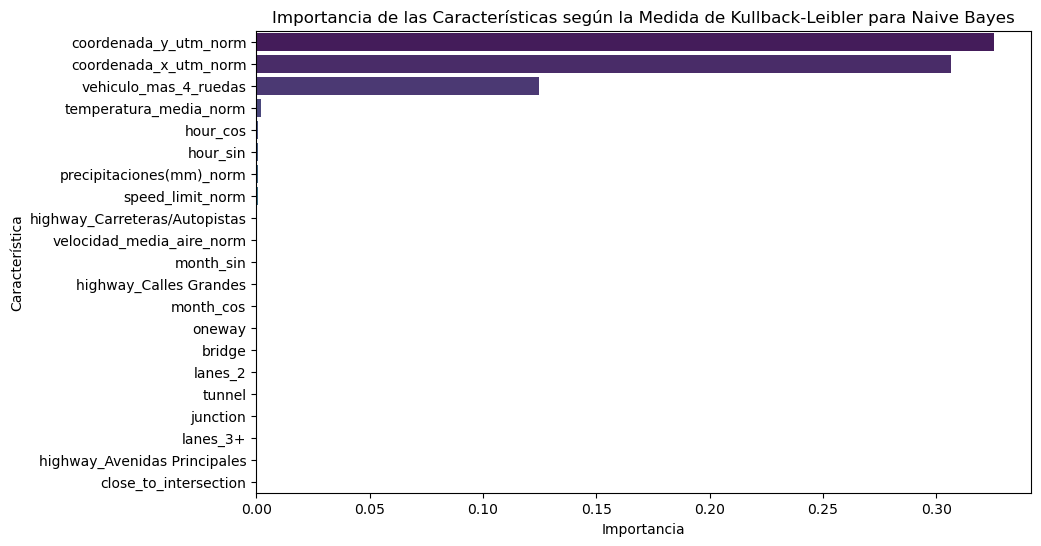

In [24]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

def calcular_importancia_kl(X, y):
    """
    Calcula la importancia de las características utilizando la medida de Kullback-Leibler.
    
    Parámetros:
    X: DataFrame de características.
    y: Serie de etiquetas de clase.
    
    Retorna:
    DataFrame con la importancia de cada característica.
    """
    # Codificar las etiquetas de clase
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    clases = np.unique(y_encoded)
    n_clases = len(clases)
    
    # Inicializar lista para almacenar importancias
    importancias = []
    
    # Calcular la probabilidad a priori de cada clase
    p_clase = np.array([np.mean(y_encoded == c) for c in clases])
    
    # Iterar sobre cada característica
    for col in X.columns:
        # Obtener los valores únicos de la característica
        valores = X[col].unique()
        
        # Inicializar la divergencia KL acumulada para la característica
        kl_total = 0
        
        # Iterar sobre cada valor de la característica
        for val in valores:
            # Calcular la probabilidad de la característica tomando el valor actual
            p_val = np.mean(X[col] == val)
            
            # Calcular la probabilidad condicional de cada clase dado el valor de la característica
            p_clase_dado_val = np.array([
                np.mean(y_encoded[X[col] == val] == c) for c in clases
            ])
            
            # Evitar divisiones por cero y logaritmos de cero
            p_clase_dado_val = np.clip(p_clase_dado_val, 1e-10, 1)
            p_clase = np.clip(p_clase, 1e-10, 1)
            
            # Calcular la divergencia KL para el valor actual
            kl_val = entropy(p_clase_dado_val, p_clase)
            
            # Ponderar la divergencia KL por la probabilidad del valor
            kl_total += p_val * kl_val
        
        # Almacenar la importancia de la característica
        importancias.append(kl_total)
    
    # Crear DataFrame con las importancias
    importancia_df = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': importancias
    }).sort_values(by='Importancia', ascending=False)
    
    return importancia_df

# Supongamos que X_train es el DataFrame de características y y_train la Serie de etiquetas
importancia_df = calcular_importancia_kl(X_train, y_train)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según la Medida de Kullback-Leibler para Naive Bayes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_ml.drop(columns=['lesividad_binaria', 'lanes_1', 'highway_Calles Pequeñas', 'vehiculo_mas_4_ruedas'])
y = df_ml['lesividad_binaria']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.5317
Precisión: 0.4667
Recall: 0.3990
F1-Score: 0.4302


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\1514713739.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')


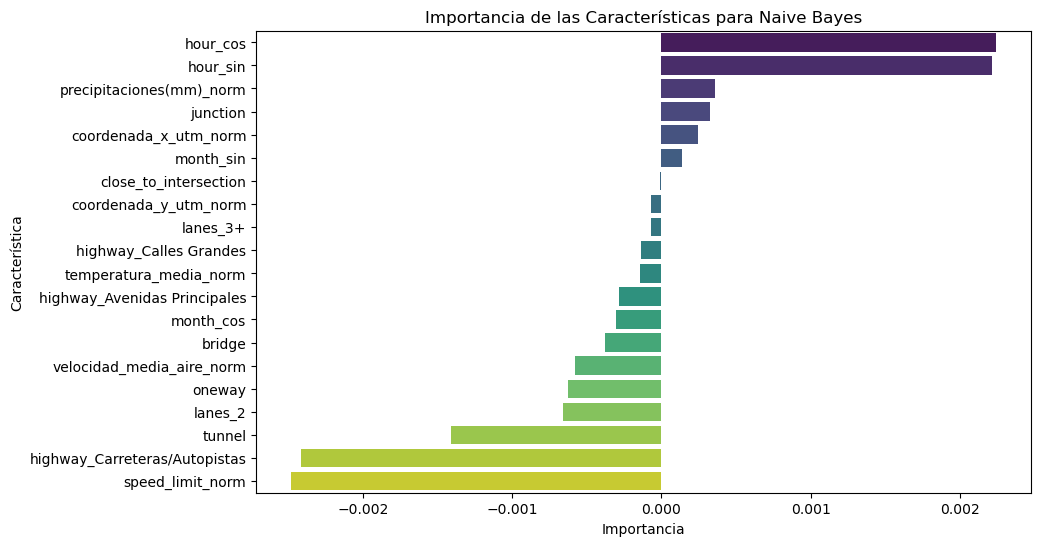

In [26]:
# Ejecutar la función para obtener el mejor modelo y predicciones
best_nb_model, y_pred_nb = naive_bayes_classification(X_train, y_train, X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Obtener la importancia de las características usando Permutation Importance
perm_importance = permutation_importance(best_nb_model, X_train, y_train, n_repeats=10, random_state=42)

# Crear un DataFrame para la importancia de las características
features = X_train.columns
importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características para Naive Bayes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_14248\155222538.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='viridis')


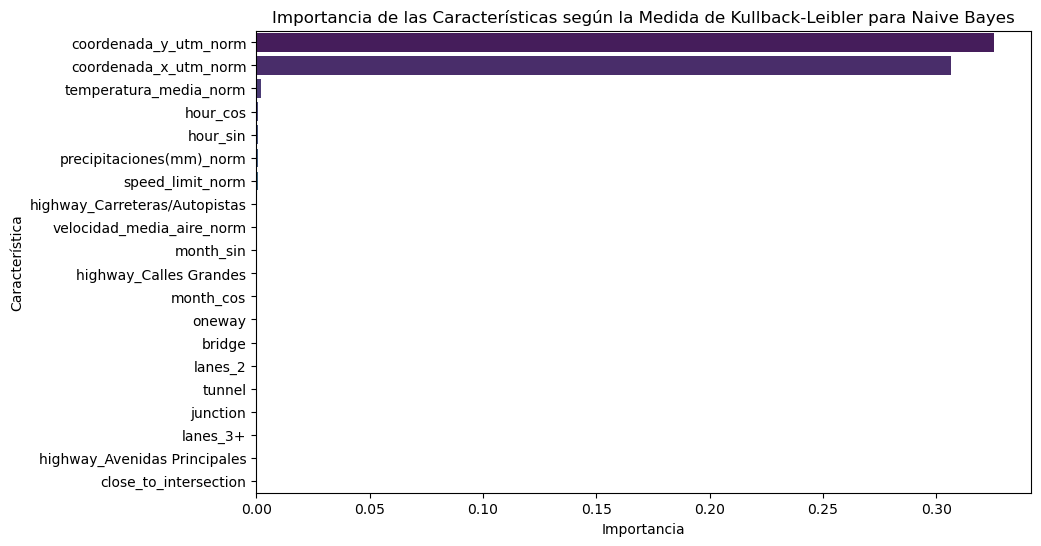

In [22]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

def calcular_importancia_kl(X, y):
    """
    Calcula la importancia de las características utilizando la medida de Kullback-Leibler.
    
    Parámetros:
    X: DataFrame de características.
    y: Serie de etiquetas de clase.
    
    Retorna:
    DataFrame con la importancia de cada característica.
    """
    # Codificar las etiquetas de clase
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    clases = np.unique(y_encoded)
    n_clases = len(clases)
    
    # Inicializar lista para almacenar importancias
    importancias = []
    
    # Calcular la probabilidad a priori de cada clase
    p_clase = np.array([np.mean(y_encoded == c) for c in clases])
    
    # Iterar sobre cada característica
    for col in X.columns:
        # Obtener los valores únicos de la característica
        valores = X[col].unique()
        
        # Inicializar la divergencia KL acumulada para la característica
        kl_total = 0
        
        # Iterar sobre cada valor de la característica
        for val in valores:
            # Calcular la probabilidad de la característica tomando el valor actual
            p_val = np.mean(X[col] == val)
            
            # Calcular la probabilidad condicional de cada clase dado el valor de la característica
            p_clase_dado_val = np.array([
                np.mean(y_encoded[X[col] == val] == c) for c in clases
            ])
            
            # Evitar divisiones por cero y logaritmos de cero
            p_clase_dado_val = np.clip(p_clase_dado_val, 1e-10, 1)
            p_clase = np.clip(p_clase, 1e-10, 1)
            
            # Calcular la divergencia KL para el valor actual
            kl_val = entropy(p_clase_dado_val, p_clase)
            
            # Ponderar la divergencia KL por la probabilidad del valor
            kl_total += p_val * kl_val
        
        # Almacenar la importancia de la característica
        importancias.append(kl_total)
    
    # Crear DataFrame con las importancias
    importancia_df = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': importancias
    }).sort_values(by='Importancia', ascending=False)
    
    return importancia_df

# Supongamos que X_train es el DataFrame de características y y_train la Serie de etiquetas
importancia_df = calcular_importancia_kl(X_train, y_train)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de las Características según la Medida de Kullback-Leibler para Naive Bayes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()
